In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
from fastai.vision import *
from fastai.metrics import error_rate

In [31]:
bs = 64

In [32]:
data = ImageDataBunch.from_folder("./data_v2" , size = 32, valid_pct= 0.15, seed = 42)

In [33]:
data

ImageDataBunch;

Train: LabelList (24088 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
anime,anime,anime,anime,anime
Path: data_v2;

Valid: LabelList (4250 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
not_anime,anime,anime,anime,anime
Path: data_v2;

Test: None

- [ ] Try Transforms.
- [ ] Try Size. Warning triggered when size argument is omitted. data.show_batch errors out without the size argument.
- [ ] Are Data Augmentations and Transforms entirely different things? If yes try Augmentation too.
- [ ] Try Normalization.
### Results:
- Without Transform:
- With Transform:
<hr>
- Without Size:
- With Size (32) :

- [ ] Check fastai notebooks for usual CIFAR10 batch sizes. 
- Size 32 does not look great.
- Size = (16,16), (32,32), (64,64) are not great either. Why do the 32x32 images look bad when CIFAR10 images are 32x32.
- Size = (120,120), (150,150) seem better for the anime images at least.
- Images look bad because 32x32 is really really small.

### data.show_batch errors out when the image sizes are different.

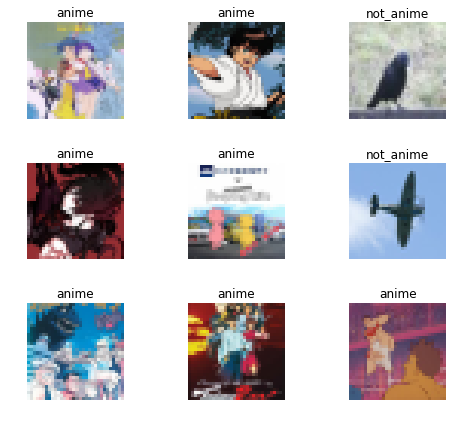

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [34]:
print(data.classes)

['anime', 'not_anime']


In [35]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [36]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

epoch,train_loss,valid_loss,error_rate,time
0,0.340504,0.299803,0.124941,00:23
1,0.232437,0.189790,0.075529,00:23
2,0.188463,0.163748,0.060706,00:23
3,0.163202,0.152302,0.059294,00:23


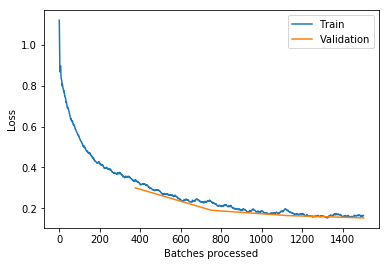

In [37]:
learn.fit_one_cycle(4)
learn.recorder.plot_losses()

In [38]:
learn.save('stage-1-data_v2')

# Results:

We will now plot the images where the model was most confused.

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

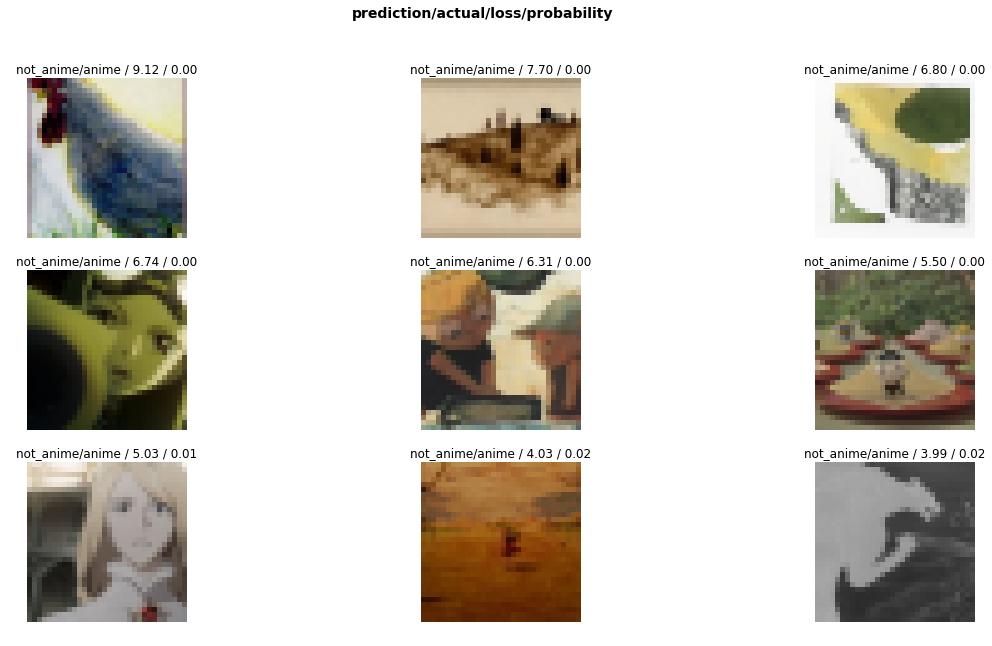

In [40]:
interp.plot_top_losses(9, figsize = (20,10))

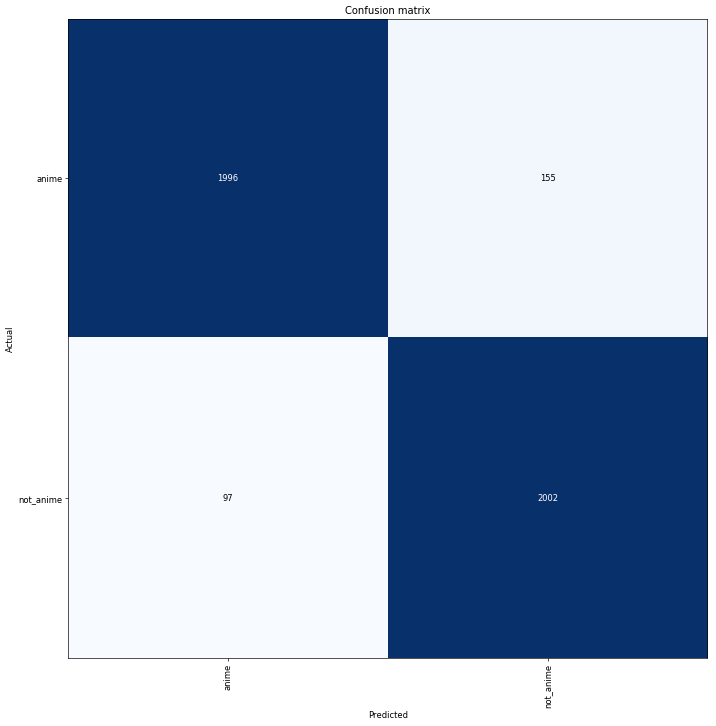

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Unfreezing, fine-tuning, and learning rates

If our model is working as expected, we will unfreeze our model and train some more.

In [42]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,0.101731,0.075978,0.027059,00:25


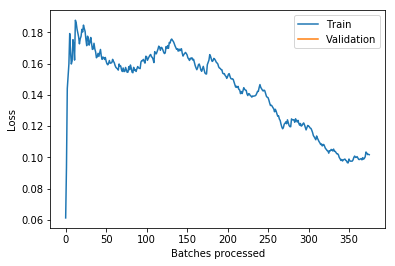

In [43]:
learn.fit_one_cycle(1)
learn.recorder.plot_losses()

In [17]:
#learn.load('stage-1_v2');

### Since post - unfreeze error is smaller, we'll use this learner.

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


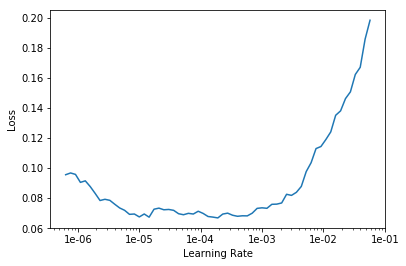

In [45]:
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.095247,0.093006,0.030824,00:29
1,0.042912,0.068264,0.022824,00:46


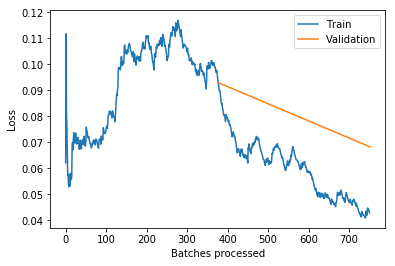

In [46]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-2))
learn.recorder.plot_losses()

#  Trying resnet50 with bigger images and half the batch size:

In [47]:
data = ImageDataBunch.from_folder("./data_v2" , size = 64, valid_pct= 0.15, seed = 42, bs = bs//2)

In [48]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


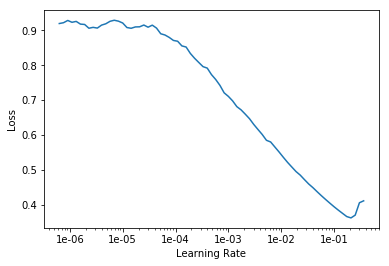

In [49]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.039837,0.029225,0.010353,01:31
1,0.022732,0.004192,0.001647,01:16
2,0.004678,0.000581,0.000235,00:48
3,0.006827,0.000326,0.000000,00:49
4,0.001379,0.000334,0.000235,00:47
5,0.001040,0.001004,0.000235,00:48
6,0.002158,0.000361,0.000235,00:48
7,0.005515,0.000565,0.000235,00:48


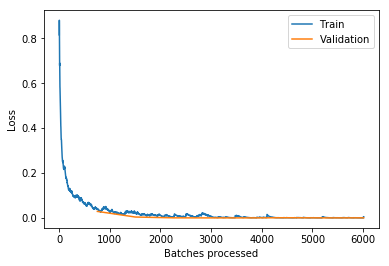

In [50]:
learn.fit_one_cycle(8)
learn.recorder.plot_losses()

### Throughout this notebook, our validation loss has been less than or equal to our train loss.
### Could this be because our validation set is highly biased towards non anime images?

In [51]:
learn.save('stage-1-50-data_v2')

### The below seems like a case of the lr being too high. Check the notebook from lesson 2.

epoch,train_loss,valid_loss,error_rate,time
0,0.037190,0.005434,0.000941,00:58
1,0.005725,172.281967,0.009412,00:58
2,0.000033,637.079773,0.023059,00:58


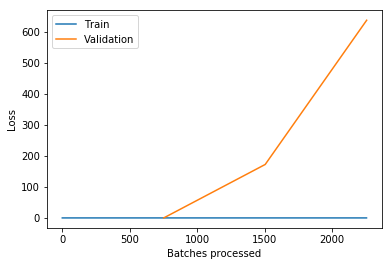

In [52]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))
learn.recorder.plot_losses()

In [53]:
learn.load('stage-1-50-data_v2')

Learner(data=ImageDataBunch;

Train: LabelList (24088 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
anime,anime,anime,anime,anime
Path: data_v2;

Valid: LabelList (4250 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
not_anime,anime,anime,anime,anime
Path: data_v2;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64